In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import gensim
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading CSV file
df = pd.read_csv('messages.csv')

In [3]:
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [4]:
print ('Shape = >',df.shape)

Shape = > (2893, 3)


In [5]:
print ('0 and 1 counts','\n',df.label.value_counts())

0 and 1 counts 
 0    2412
1     481
Name: label, dtype: int64


In [6]:
df.dtypes

subject    object
message    object
label       int64
dtype: object

In [7]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [8]:
df['length'] = df.message.str.len()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


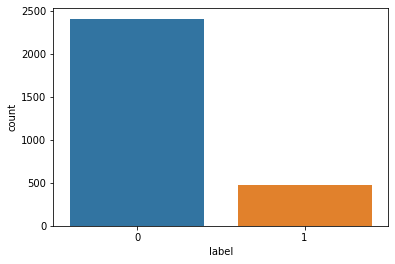

In [9]:
sns.countplot(df['label'])

In [10]:
# importing necessary libraries for pre processing texts
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import string
import re
wordnet=WordNetLemmatizer()
stemmer=PorterStemmer()

In [11]:
# pre processing the text
message=[]
for i in range(0,len(df['message'])):
    
    review = re.sub('[^a-zA-Z]',' ', df['message'][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in string.punctuation if not word in stopwords.words('english')]
    review = ' '.join(review)
    message.append(review)

In [12]:
message

['content length apple i research center u million joint venture apple computer inc institute system science national university singapore located singapore looking senior speech scientist successful candidate research expertise computational linguistics including natural language processing english chinese statistical language modeling knowledge state art corpus based n gram language model cache language model part speech language model required text speech project leader successful candidate research expertise expertise two following area computational linguistics including natural language parsing lexical database design statistical language modeling text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese required knowledge acoustic phonetics speech signal processing desirable candidate phd least year relevant work experience technical msc degree least year experienc e strong software engineering skill including design implementatio

In [13]:
len(message)

2893

In [14]:
df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [15]:
# Remove stopwords
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))

df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [16]:
df['clean_length'] = df.message.str.len()
df.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,2487
1,NaN,"lang classification grimes , joseph e . barbar...",0,1800,1571
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas ( satamas @ umab...,0,1435,1144
3,risk,colleague researching differing degrees risk p...,0,324,220
4,request book information,earlier morning phone friend mine living south...,0,1046,719


In [17]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 9344743
Clean Length 7551965


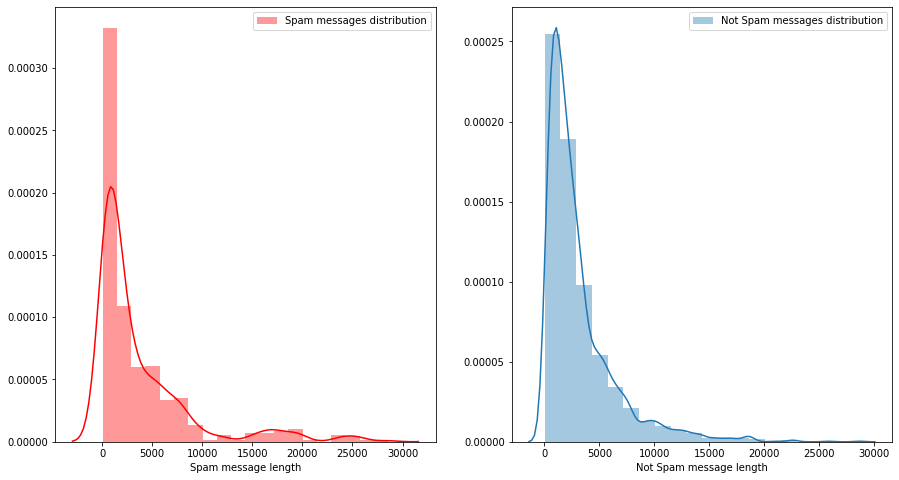

In [18]:
# Message distribution BEFORE cleaning
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='Not Spam messages distribution')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()

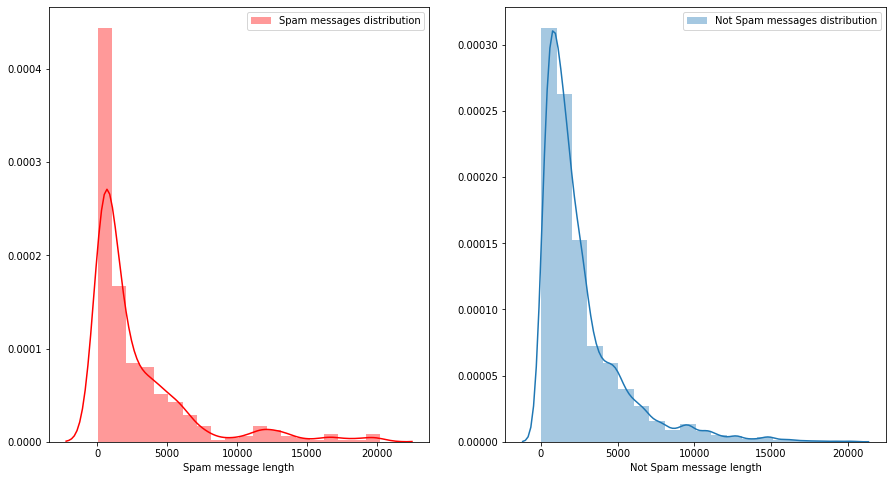

In [19]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='Not Spam messages distribution')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()

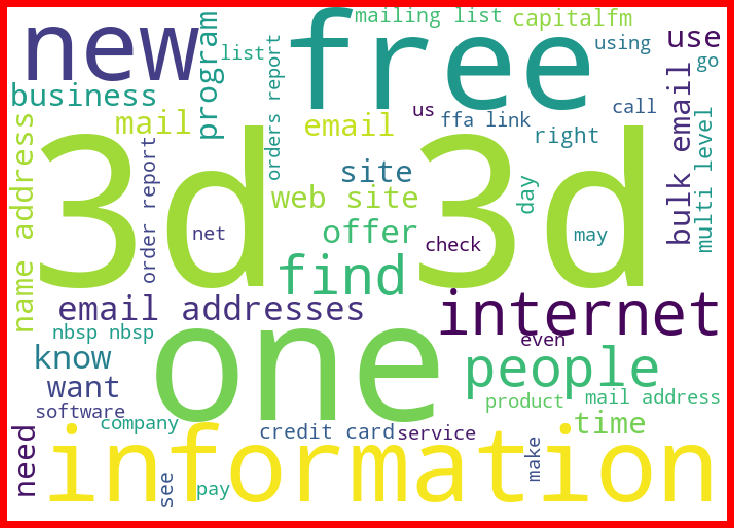

In [20]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

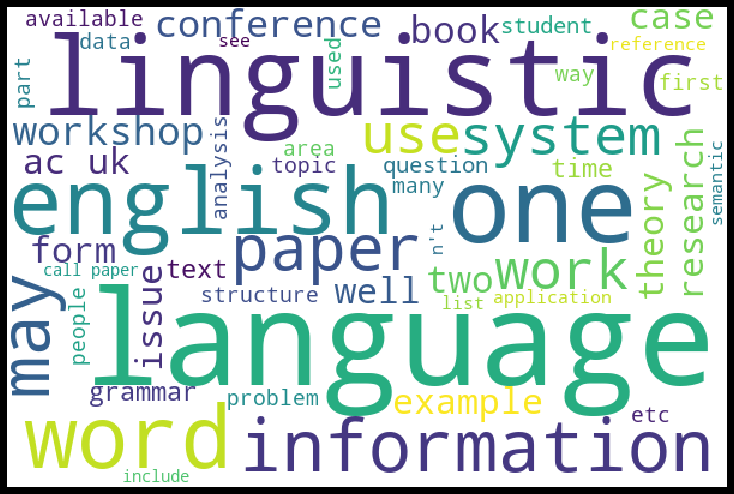

In [21]:
#Getting sense of loud words in Not Spam 

Not_Spam = df['message'][df['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(Not_Spam))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
from nltk.stem import SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
stemmer=SnowballStemmer("english")

In [23]:

# writing function for entire dataset
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>2:
            result.append(lemmatize_stemming(token))
            
    return result

In [24]:
result=[] 
for doc in df['message']:
    for token in gensim.utils.simple_preprocess(doc):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>2:
            result.append(stemmer.stem(WordNetLemmatizer().lemmatize(token)))

In [25]:
processed_docs=[]
for doc in df['message']:
    processed_docs.append(preprocess(doc))

In [26]:
# Creating Dictionary on dataset of messages
dictionary=gensim.corpora.Dictionary(processed_docs)

In [27]:
print(dictionary)

Dictionary(41476 unique tokens: ['acoust', 'advantag', 'analysi', 'appl', 'appli']...)


In [28]:
# Let us see the dictionary
count=0
for k,v in dictionary.iteritems():
    print (k,v)
    count +=1
    if count>20:
        break

0 acoust
1 advantag
2 analysi
3 appl
4 appli
5 area
6 art
7 attend
8 base
9 benefit
10 break
11 cach
12 california
13 candid
14 center
15 chines
16 competit
17 compil
18 complet
19 comput
20 confer


In [29]:

# remove rare and repetitive words
dictionary.filter_extremes(no_below=15,no_above=0.1,keep_n=500000)

In [30]:
print(dictionary)

Dictionary(3349 unique tokens: ['acoust', 'advantag', 'appl', 'art', 'attend']...)


In [31]:
#Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to 'bow_corpus'
bow_message=[dictionary.doc2bow(doc) for doc in processed_docs]

In [32]:

bow_message[5]

[(8, 2),
 (9, 1),
 (28, 1),
 (33, 1),
 (44, 1),
 (47, 1),
 (62, 1),
 (81, 2),
 (105, 1),
 (111, 1),
 (116, 1),
 (133, 1),
 (137, 1),
 (143, 1),
 (144, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 6),
 (200, 2),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 2),
 (208, 1),
 (209, 5),
 (210, 1),
 (211, 6),
 (212, 1),
 (213, 1),
 (214, 4),
 (215, 1),
 (216, 1),
 (217, 1),
 (218, 2),
 (219, 1),
 (220, 2),
 (221, 1),
 (222, 2),
 (223, 1),
 (224, 1),
 (225, 3),
 (226, 1),
 (227, 1),
 (228, 1),
 (229, 1),
 (230, 1),
 (231, 1),
 (232, 3),
 (233, 1),
 (234, 1),
 (235, 1),
 (236, 1),
 (237, 1),
 (238, 1),
 (239, 1),
 (240, 1),
 (241, 1),
 (242, 1),
 (243, 1),
 (244, 1),
 (245, 2),
 (246, 1),
 (247, 1),
 (248, 1),
 (249, 11),
 (250, 1),
 (251, 1),
 (252, 1),
 (253, 1),
 (254, 8),
 (255, 1),
 (256, 1),
 (257, 1),
 (258, 1),
 (259, 2),
 (260, 2),
 (261, 2),
 (262, 1),
 (263, 3),
 (264, 1),
 (265, 2),
 (266, 2),
 (267, 1),
 (268, 2),
 (269, 5),
 (270, 2),
 (271, 1),
 (272, 1

In [33]:
# preview
document_num=10
bow_doc_x=bow_message[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], dictionary[bow_doc_x[i][0]], bow_doc_x[i][1]))

Word 28 ("interact") appears 1 time.
Word 143 ("inquiri") appears 1 time.
Word 199 ("anonym") appears 2 time.
Word 201 ("april") appears 1 time.
Word 218 ("constraint") appears 1 time.
Word 220 ("cover") appears 1 time.
Word 232 ("ftp") appears 1 time.
Word 252 ("object") appears 1 time.
Word 256 ("paul") appears 1 time.
Word 263 ("pub") appears 1 time.
Word 349 ("equip") appears 1 time.
Word 400 ("aim") appears 1 time.
Word 401 ("arriv") appears 1 time.
Word 402 ("assembl") appears 1 time.
Word 403 ("brief") appears 1 time.
Word 404 ("card") appears 1 time.
Word 405 ("conclus") appears 1 time.
Word 406 ("core") appears 1 time.
Word 407 ("document") appears 1 time.
Word 408 ("doubl") appears 1 time.
Word 409 ("dynam") appears 1 time.
Word 410 ("essex") appears 1 time.
Word 411 ("event") appears 2 time.
Word 412 ("font") appears 1 time.
Word 413 ("gather") appears 1 time.
Word 414 ("geert") appears 1 time.
Word 415 ("geneva") appears 1 time.
Word 416 ("groningen") appears 5 time.
Word 4

In [34]:
lda_model=gensim.models.LdaMulticore(bow_message,num_topics=30,id2word=dictionary,passes=10,workers=2)

In [35]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx,topic))
    print("\n")

Topic: 27 
Words: 0.011*"gruyter" + 0.009*"berlin" + 0.009*"mouton" + 0.009*"york" + 0.009*"georgetown" + 0.008*"spanish" + 0.007*"california" + 0.007*"texa" + 0.006*"teacher" + 0.006*"washington"


Topic: 16 
Words: 0.018*"object" + 0.013*"relev" + 0.010*"express" + 0.009*"verb" + 0.007*"rule" + 0.007*"correct" + 0.007*"interpret" + 0.007*"risk" + 0.006*"accus" + 0.006*"affix"


Topic: 26 
Words: 0.021*"stanford" + 0.021*"pacif" + 0.021*"dictionari" + 0.020*"context" + 0.018*"australian" + 0.016*"congress" + 0.014*"australia" + 0.012*"csli" + 0.011*"anu" + 0.010*"isbn"


Topic: 2 
Words: 0.012*"hotel" + 0.012*"tutori" + 0.009*"programm" + 0.009*"franc" + 0.009*"chair" + 0.008*"symposium" + 0.007*"poster" + 0.007*"septemb" + 0.006*"european" + 0.006*"netherland"


Topic: 28 
Words: 0.029*"vowel" + 0.010*"initi" + 0.009*"conson" + 0.009*"length" + 0.008*"latin" + 0.007*"bilingu" + 0.007*"syllabl" + 0.007*"standard" + 0.006*"insert" + 0.006*"greek"


Topic: 3 
Words: 0.012*"credit" + 0.0

In [36]:
#Usinf TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tvec=TfidfVectorizer()

x=tvec.fit_transform(message)
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

cvec=CountVectorizer()
lreg=LogisticRegression()
gaus=GaussianNB()

#Using count vectorizer
x=cvec.fit_transform(message).toarray()

In [38]:
x.shape

(2893, 50987)

In [39]:
y=pd.DataFrame(df['label'])

In [40]:
#splitting data in to train & test
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

AS_score_Cvec=[]
CV_score_Cvec=[]

models_Cvec=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for i in models_Cvec:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    score = accuracy_score(pred,test_y)
    print("\nAccuracy Score\n",score)
    AS_score_Cvec.append(score)
    print(classification_report(pred,test_y))
    print(confusion_matrix)
    print("")
    cvscore = cross_val_score(i,x,y,cv=5).mean()
    print("\nThe cross validation score is\n", cvscore)
    CV_score_Cvec.append(cvscore)
    


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy Score
 0.9948186528497409
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       463
           1       0.99      0.98      0.99       116

    accuracy                           0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579

<function confusion_matrix at 0x0000019A952BE048>


The cross validation score is
 0.9910094281435577
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=No

In [42]:
model_scores_Cvec=pd.DataFrame({'Models_Cvec':['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'GaussianNB'],'Accuracy Score':AS_score_Cvec,'Cross Validation Score':CV_score_Cvec})

model_scores_Cvec


,Models_Cvec,Accuracy Score,Cross Validation Score
0,LogisticRegression,0.994819,0.991009
1,DecisionTreeClassifier,0.967185,0.955063
2,KNeighborsClassifier,0.922280,0.896293
3,SVC,0.841105,0.865188
4,GaussianNB,0.939551,0.951258


In [44]:
#let us find best parameters using GridSearchcv for logistic regression
from sklearn.model_selection import GridSearchCV
#grid={'C':np.logspace(-3,3.7), 'penalty':['l1','l2']}
grid={'C':[0.001,0.01,0.1,1,10,100,1000], 'penalty':['l1','l2']}
gridcv=GridSearchCV(lreg,grid,cv=10)
gridcv.fit(train_x,train_y)
print(gridcv.best_params_)

{'C': 1, 'penalty': 'l2'}


In [45]:
lreg=LogisticRegression()
lreg.fit(train_x,train_y)
pred=lreg.predict(test_x)
print("Accuracy Score is", accuracy_score(test_y,pred))
print("The cross validation score is", cross_val_score(lreg,x,y,cv=5).mean())
print(classification_report(test_y,pred))
print(confusion_matrix(test_y,pred))

Accuracy Score is 0.9948186528497409
The cross validation score is 0.9910094281435577
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       464
           1       0.98      0.99      0.99       115

    accuracy                           0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579

[[462   2]
 [  1 114]]


In [46]:
# The results have slightly increased. Hence, we can finalise the model
from sklearn.externals import joblib
joblib.dump(lreg,'Spam_Messages_LG.pkl')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Spam_Messages_LG.pkl']